In [62]:
import matplotlib
import matplotlib.pyplot as plt
import cPickle as pickle
import gzip
import numpy as np
%matplotlib inline

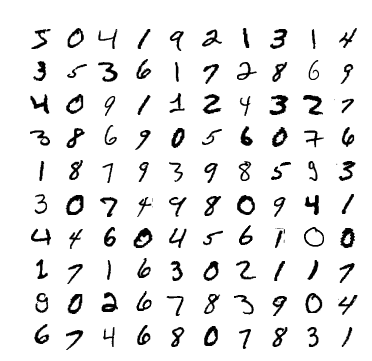

In [63]:
#Loding the MNIST dataset
#XTrain[x,y] - x is features; by that we understand 50000 entries, each being an array with 28x28= 784 pixels as elements

#XValid[x, y] as above only containing 10000 images
#XTest[x, y] similar to XValid
data = gzip.open('mnist.pkl.gz', 'rb')
#Split data into training and testing data
XTrain, XValid, XTest = pickle.load(data)
data.close()
#print XValid

#smaller training set of 100 images
raw_image = XTrain[0][0:100]
image_labels = XTrain[1][0:100]
Visualize = (raw_image, image_labels)
#Holy molly, had help plotting this https://stackoverflow.com/questions/37228371/visualize-mnist-dataset-using-opencv-or-matplotlib-pyplot
fig = plt.figure(num=None, figsize=(6,6))
for i in range(1,101):
    ax = fig.add_subplot(10,10,i)
    ax.set_axis_off()
    ax.matshow(raw_image[i-1].reshape((28, 28)), cmap = matplotlib.cm.binary)


In [65]:
def reshape_output(i):
    output = np.zeros((10, 1))
    output[i] = 1.0
    return output

In [66]:
yTrain = np.zeros((len(XTrain[0]),10))
yValid = np.zeros((len(XValid[0]),10))
yTest = np.zeros((len(XTest[0]),10))
for i in range (len(XTrain[0])):
    yTrain[i] = np.transpose(reshape_output(np.int8(XTrain[1][i])))
for i in range (len(XValid[0])):
    yValid[i] = np.transpose(reshape_output(np.int8(XValid[1][i])))
for i in range (len(XTest[0])):
    yTest[i] = np.transpose(reshape_output(np.int8(XTest[1][i])))
#print yTest.shape
#Now we have split data conveniently!

In [67]:
#working on this until proper debug
lista = np.zeros((100, 10))
for i in range (len(raw_image)):
    lista[i] = np.transpose(reshape_output(np.int8(image_labels[i])))

In [68]:
#https://pypi.org/project/import-ipynb/ used this to import another notebook
#import import_ipynb
#import BP
#didnt work so
%run BP.ipynb

net = nn([784,4,4,10])
#because of formatting reasons, calling train on XTrain or XValid should be XTrain[0] - since of 1 is output
predictions = net.train(raw_image, lista, 0.2, 5)
#gotta use SGD 

In [70]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

print 'Accuracy is:', accuracy_score(lista, predictions)
print 'How predictions should look:'
print lista
print '\n'
print 'How predictions look:'
print predictions
print '\n'
print 'Errors are:'
print abs(lista-predictions)
print 'No of errors is:', np.sum(abs(lista-predictions))
print 'Confusion matrix is:'
print confusion_matrix(lista, predictions)

 Accuracy is:

ValueError: Expected array-like (array or non-string sequence), got None